# Regression using Numeric, Bool and Date features
We saw that regression on numeric features produced an r-squared value of 0.06 which is awful. Let's add the bool features and date features, and see if that does better.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Load Numeric Data

In [3]:
# We have to use float for now because int cannot accept NaN
num_data = pd.read_csv('./data/numeric_features.csv', low_memory=False, dtype=float)
print num_data.columns
num_data = num_data.drop('Unnamed: 0', axis=1)
num_data['id'] = num_data['id'].astype(int).astype("category")

num_data = num_data.drop('host_total_listings_count', axis=1)

print num_data.shape
num_data.sample()

Index([u'Unnamed: 0', u'id', u'bathrooms', u'bedrooms', u'beds',
       u'cleaning_fee', u'guests_included', u'host_listings_count',
       u'host_total_listings_count', u'host_acceptance_rate',
       u'host_response_rate'],
      dtype='object')
(243721, 9)


id  bathrooms  bedrooms  beds  cleaning_fee  guests_included  \
242322  17721392        1.0       2.0   2.0          75.0              1.0   

        host_listings_count  host_acceptance_rate  host_response_rate  
242322                  2.0                   NaN                 1.0

# Load Bool Data

In [4]:
bool_data = pd.read_csv('./data/bool_features.csv', low_memory=False, dtype=int)
print bool_data.columns

bool_data = bool_data.drop('Unnamed: 0', axis=1)
bool_data['id'] = bool_data['id'].astype(int).astype("category")

bool_data.host_has_profile_pic = bool_data.host_has_profile_pic.astype(bool)
bool_data.host_identity_verified = bool_data.host_identity_verified.astype(bool)

print bool_data.shape


Index([u'Unnamed: 0', u'id', u'host_has_profile_pic',
       u'host_identity_verified'],
      dtype='object')
(243721, 3)


# Load Date Data

In [5]:
parse_dates = ['host_since', 'last_scraped', 'days_delta']
date_data = pd.read_csv('./data/date_features.csv', low_memory=False, parse_dates=parse_dates)
print date_data.columns


date_data = date_data.drop('Unnamed: 0', axis=1)
date_data['id'] = date_data['id'].astype(int).astype("category")
date_data.days_delta = date_data.days_delta.apply(lambda x: x.split(' ')[0]).astype(float)

print date_data.shape
date_data.sample()

Index([u'Unnamed: 0', u'id', u'host_since', u'last_scraped', u'days_delta'], dtype='object')
(243721, 4)


id host_since last_scraped  days_delta
102081  16203243 2013-02-15   2017-06-02      1568.0

# Load Reviews Data (Dependent variable)

In [6]:
reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
print reviews_data.columns

reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")
print reviews_data.shape
reviews_data.sample()

Index([u'Unnamed: 0', u'id', u'number_of_reviews', u'review_scores_rating',
       u'review_scores_value', u'reviews_per_month'],
      dtype='object')
(243721, 5)


id  number_of_reviews  review_scores_rating  review_scores_value  \
180199  3093070                5.0                  92.0                  9.0   

        reviews_per_month  
180199               0.63

## We can use reviews_per_month as an independent variable

In [7]:
# Generate random indexes for our sample
import numpy as np

np.random.seed(1234)
sample_size=10000
idxs = np.random.randint(0, num_data.shape[0], sample_size)
idxs

array([224047, 189139, 165158, ..., 149821, 130353, 163357])

# Select Dependent Variable

Also, let's drop missing values from our dependent variable.
And let's drop the Id column.

In [8]:
# Set the dependent variable 
dependent_variable = 'review_scores_rating'

# Select the independent variables and get a combined dataset
data = pd.concat([num_data.loc[idxs], 
                  bool_data.loc[idxs][['host_has_profile_pic', 'host_identity_verified']], 
                  date_data.loc[idxs][['days_delta']], 
                  reviews_data.loc[idxs][['reviews_per_month', dependent_variable]]], axis=1)

# Drop Id column for now
data = data.drop('id', axis=1)

print data.shape
print data.columns

# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])


data.sample(10)

(10000, 13)
Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')


bathrooms  bedrooms  beds  cleaning_fee  guests_included  \
193897        1.5       1.0   1.0          45.0              1.0   
81469         1.0       0.0   1.0           NaN              1.0   
125441        1.0       1.0   1.0          50.0              0.0   
243545        1.0       1.0   1.0           NaN              1.0   
56926         1.0       1.0   1.0          25.0              1.0   
119506        1.0       1.0   1.0          35.0              1.0   
66513         1.0       0.0   2.0          99.0              1.0   
126135        1.0       1.0   1.0          15.0              2.0   
120981        1.5       1.0   1.0          25.0              1.0   
24303         1.0       1.0   1.0           NaN              1.0   

        host_listings_count  host_acceptance_rate  host_response_rate  \
193897                  2.0                   NaN                1.00   
81469                   2.0                   NaN                 NaN   
125441                  6.0                   1.0                0.96   
243545                  1.0                   NaN                0.83   
56926                   4.0                   NaN                1.00   
119506                  1.0                   NaN                 NaN   
66513                   2.0                   1.0                1.00   
126135                  1.0                   1.0                1.00   
120981                  1.0                   NaN                1.00   
24303                   1.0                   NaN                1.00   

        host_has_profile_pic  host_identity_verified  days_delta  \
193897                  True                    True      1498.0   
81469                   True                    True       310.0   
125441                  True                    True       556.0   
243545                  True                    True       929.0   
56926                   True                    True      2280.0   
119506                  True                    True      2433.0   
66513                   True                    True       296.0   
126135                  True                    True      1456.0   
120981                  True                    True      1262.0   
24303                   True                    True      1643.0   

        reviews_per_month  review_scores_rating  
193897               2.37                  91.0  
81469                0.29                 100.0  
125441               0.59                  82.0  
243545               0.97                  97.0  
56926                4.31                  97.0  
119506               0.18                  73.0  
66513                3.85                  90.0  
126135               1.06                 100.0  
120981               2.76                  98.0  
24303                1.00                 100.0

bathrooms


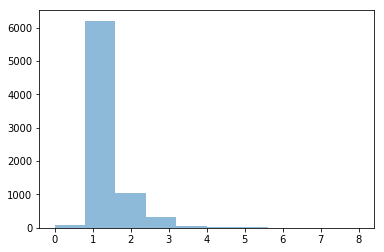

bedrooms


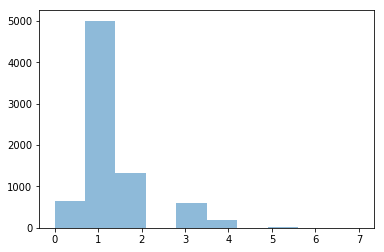

beds


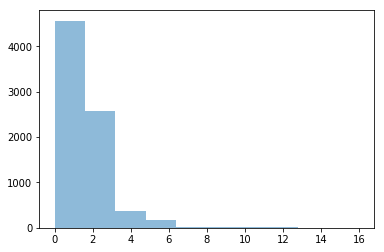

cleaning_fee


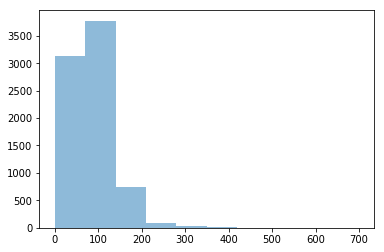

guests_included


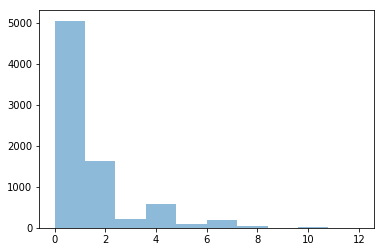

host_listings_count


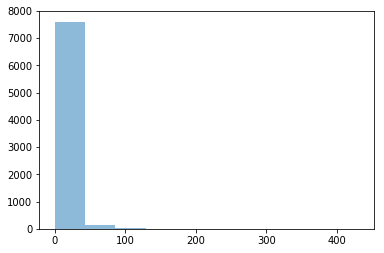

host_acceptance_rate


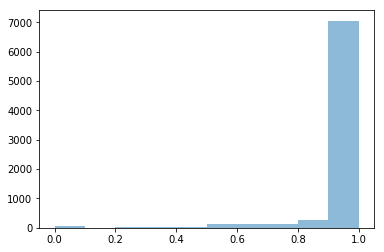

host_response_rate


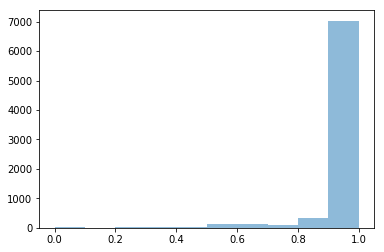

host_has_profile_pic


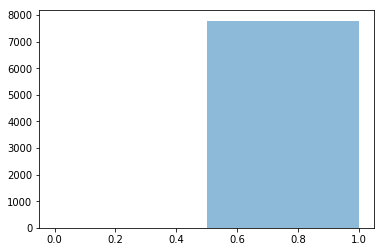

host_identity_verified


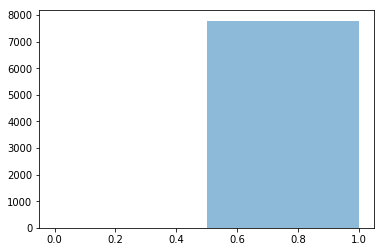

days_delta


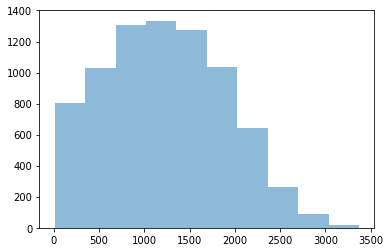

reviews_per_month


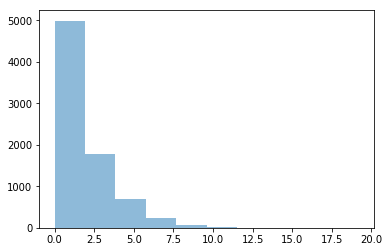

review_scores_rating


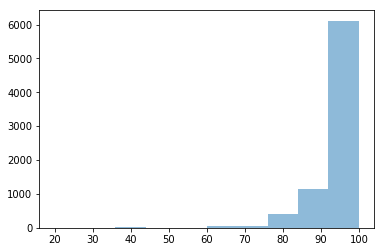

In [9]:
import matplotlib.pyplot as plt
for c in data.columns:
    if 'id' != c:
        print c
        lst = list(data[c].fillna(data[c].median()))
        
        b = 10
        if data[c].dtype == 'bool':
            b = 2
        plt.hist(lst, bins=b, alpha=0.5)
        plt.show()

bathrooms


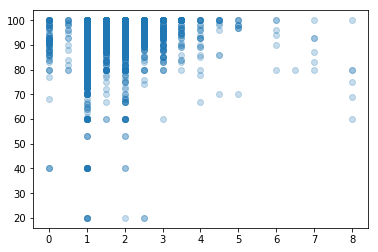

bedrooms


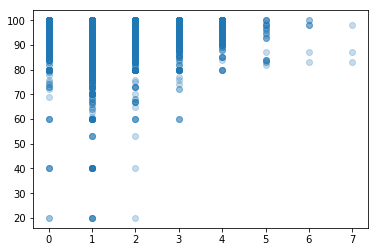

beds


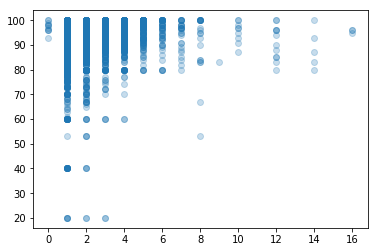

cleaning_fee


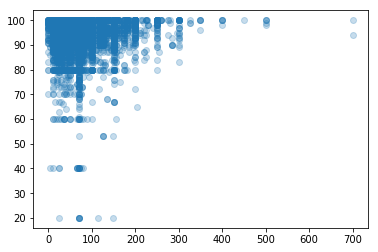

guests_included


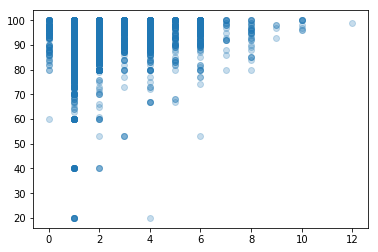

host_listings_count


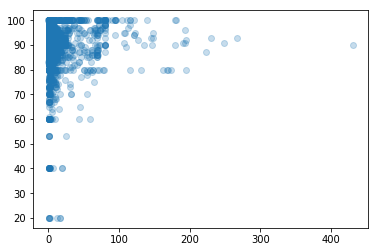

host_acceptance_rate


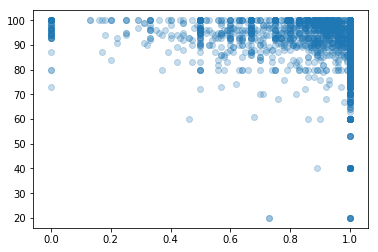

host_response_rate


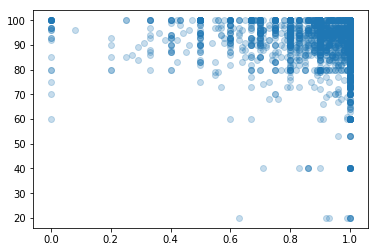

host_has_profile_pic


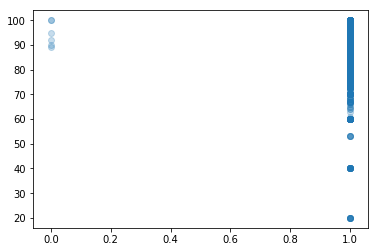

host_identity_verified


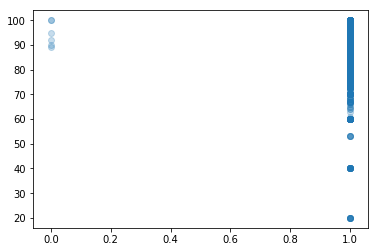

days_delta


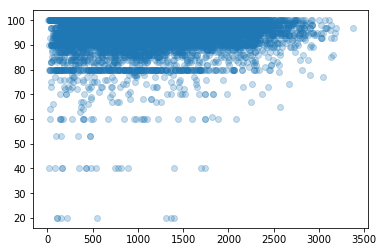

reviews_per_month


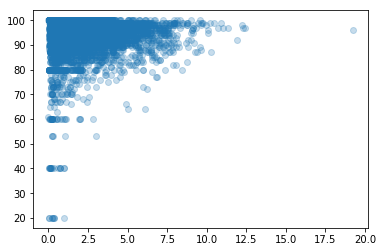

In [10]:
y_vals = data[dependent_variable].fillna(data[dependent_variable].mean())
for c in data.columns:
    if c not in ['id', dependent_variable]:
        print c
        lst = list(data[c].fillna(np.nanmedian(data[c])))
        plt.scatter(lst, y_vals, alpha=0.25)
        plt.show()

# Takeaways
1. Remove 'bathrooms' >= 5
2. Remove 'bedrooms' > 5
3. Remove 'beds' >= 8
4. Remove 'cleaning_fee' >= 400
5. Remove 'guests_included' > 8
6. Remove 'host_listings_count' > 100
7. Remove 'host_acceptance_rate' == 0.
8. Remove 'host_response_rate' == 0.
9. Remove 'reviews_per_month' > 12.
10. Drop 'host_has_profile_pic'
11. Drop 'host_identity_verified'

# Split data into Train and Test sets

Before preprocessing data, we need split it into Train and Test sets. Once split, we will impute missing values using Median. And finally, we will drop the outliers as mentioned in the Takeaways section. This sequence is important because we have a ton of missing values, and we'd be left with a tiny dataset if we dropped outliers before imputing missing values.

In [11]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(data, test_size=0.33, random_state=1234)

print Train.shape
print Test.shape

(5221, 13)
(2572, 13)


# Impute missing values for Train and Test sets
We will use Median for imputing missing values because it is not as affected by outliers as the Mean.
We will train the Imputer on the training data, and use this to fill the values for both Train and Test sets. 
We will not train a new Imputer on test data. This is important because we do not want to look at the test data when imputing the values.

In [12]:
# Impute missing values using median for both independent and dependent variables
# We don't care for host_has_profile_pic, and host_identity_verified.
# We dropped missing values from our dependent variable earlier, 
# so it won't be affected by imputation here.

import numpy as np
from sklearn.preprocessing import Imputer

# We need the 
train_colnames = Train.columns
print train_colnames

# Train data first
# axis 0 means impute along columns
train_imp = Imputer(missing_values=np.nan, strategy='median', axis=0, copy=True)
train_imp.fit(Train)
Train = train_imp.transform(Train)


# Then Test data
test_colnames = Test.columns
print test_colnames
Test = train_imp.transform(Test)

print Train.shape
print Test.shape

Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')
Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')
(5221, 13)
(2572, 13)


# Handle Outliers
Drop them, as discussed in the Takeaways section.

In [13]:
# We need DataFrames here because we're lazy
Train = pd.DataFrame(Train, columns=train_colnames)
Train.sample()
Test = pd.DataFrame(Test, columns=test_colnames)
Test.sample()

def drop_outliers(t):
    # Drop outliers from dependent variable
    h = 0
    if 'review_scores_value' == dependent_variable:
        h = 3
    elif 'review_scores_rating' == dependent_variable:
        h = 80
    t = t.loc[t[dependent_variable] >= h]

    # 1. Remove 'bathrooms' >= 5, convert to int
    t = t.loc[t.bathrooms < 5]
    t.bathrooms = t.bathrooms.astype(int)

    # 2. Remove 'bedrooms' > 5, convert to int
    t = t.loc[t.bedrooms <= 5]
    t.bedrooms = t.bedrooms.astype(int)

    # 3. Remove 'beds' >= 8, convert to int
    t = t.loc[t.beds < 8]
    t.beds = t.beds.astype(int)

    # 4. Remove 'cleaning_fee' > 400
    t = t.loc[t.cleaning_fee <= 400]

    # 5. Remove 'guests_included' > 8
    t = t.loc[t.guests_included <= 8]
    t.guests_included = t.guests_included.astype(int)

    # 6. Remove 'host_listings_count' > 100
    t = t.loc[t.host_listings_count <= 100]
    t.host_listings_count = t.host_listings_count.astype(int)

    # 7. Remove 'host_acceptance_rate' == 0.
    t = t.loc[t.host_acceptance_rate > 0.]

    # 8. Remove 'host_response_rate' == 0.
    t = t.loc[t.host_acceptance_rate > 0.]

    # 9. Remove 'reviews_per_month' > 12.
    t = t.loc[t.reviews_per_month <= 12]

    # 10. Drop 'host_has_profile_pic'
    t = t.drop('host_has_profile_pic', axis=1)

    # 11. Drop 'host_identity_verified'
    t = t.drop('host_identity_verified', axis=1)
    
    return t

Train = drop_outliers(Train)

Test = drop_outliers(Test)

print Train.shape
print Test.shape

(4984, 11)
(2450, 11)


# Separate the Dependent and Independet Variables

In [14]:
# Train data
y_train = Train[dependent_variable].values
print y_train.shape 

X_train = Train.drop([dependent_variable], axis=1).values
print X_train.shape

# Test data
y_test = Test[dependent_variable].values
print y_test.shape

X_test = Test.drop([dependent_variable], axis=1).values
print X_test.shape

(4984,)
(4984, 10)
(2450,)
(2450, 10)


# Scale the Dependent variables
We don't want any one variable dominating others in the regression model, so let's start by scaling the dependent variables. As with Imputation, we will train the scaler only on the training data (to learn the mean and standard deviation), and then use it as-is on the Test data. We will assume that all dependent variables are interval.

In [15]:
# Scale the independent and dependent variables
# Center the data around zero by subtracting the mean
# Scale it to unit variance

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Try some transformations on the Independent Variables

exp


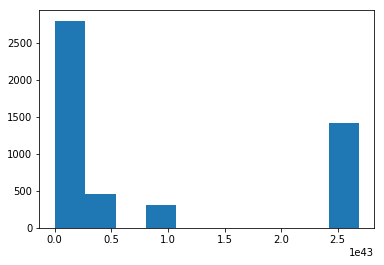

identity


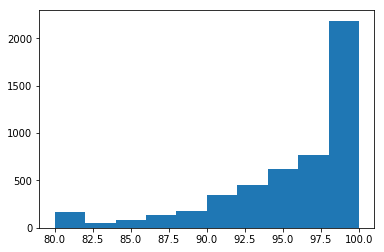

log


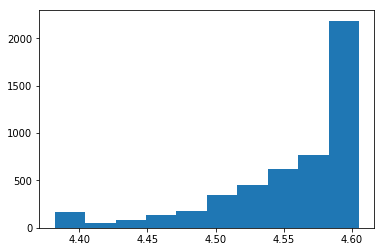

sqrt


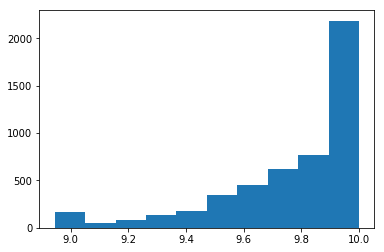

standard_scale


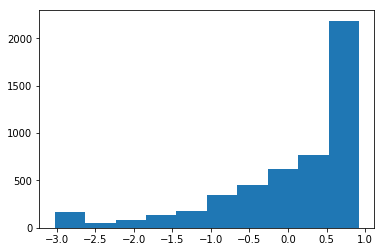

x^1/4


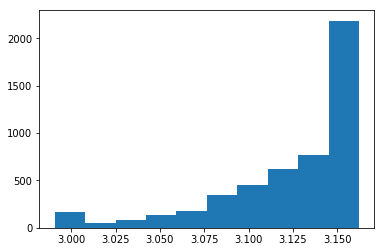

In [16]:
func_dict = {
    'identity': lambda x: x, 
    'sqrt': np.sqrt, 
    'log': np.log, 
    'exp': np.exp, 
    'x^1/4': lambda x: [i**(1./4) for i in x],
    'standard_scale': lambda x: [(i - np.mean(x)) / np.std(x) for i in x],
}

for k in sorted(func_dict.keys()):
    print k
    plt.hist(func_dict[k](y_train.ravel()))
    plt.show()


In [17]:
# Let's go with standard scaling for now

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
y_train = y_train.reshape(-1, 1)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_train = y_train.ravel()
print y_train.shape

y_test = y_test.reshape(-1, 1)
y_test = scaler.transform(y_test)
y_test = y_test.ravel()
print y_test.shape

(4984,)
(2450,)


# Create a baseline model using Training Mean

Mean squared error: 1.03
Variance score: -0.00


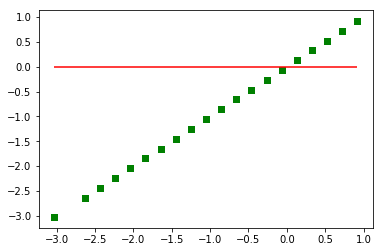

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score


m_train = np.mean(y_train)
y_test_baseline_pred = np.array([m_train for i in range(y_test.shape[0])])


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_test_baseline_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_test_baseline_pred.ravel()))

# Plot the residuals

plt.scatter(y_test, y_test-y_test_baseline_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

# Create a baseline model using Training Median

Mean squared error: 1.17
Variance score: -0.14


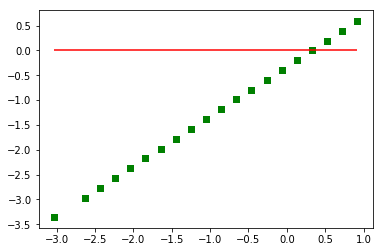

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score


m_train = np.median(y_train)
y_test_baseline_pred = np.array([m_train for i in range(y_test.shape[0])])


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_test_baseline_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_test_baseline_pred.ravel()))

# Plot the residuals

plt.scatter(y_test, y_test-y_test_baseline_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

Mean squared error: 0.98
Variance score: 0.04
train residuals:


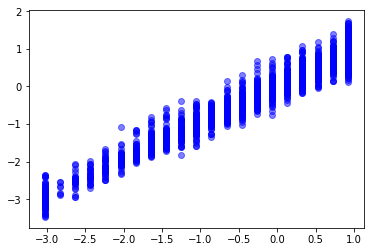

test residuals:


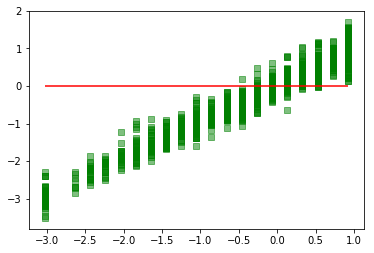

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.Lasso(alpha=0.001, fit_intercept=True, max_iter=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

# Check for endogeneity

bathrooms: correlation coef: -0.0010181645914406944


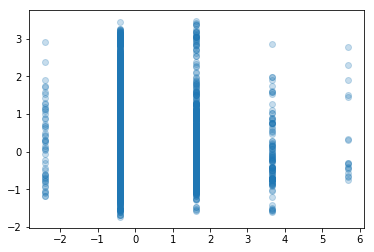

bedrooms: correlation coef: -0.0010194367062956462


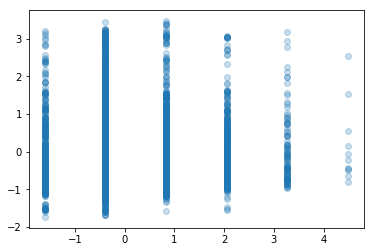

beds: correlation coef: 0.0010203541041657854


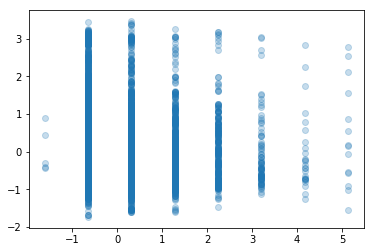

cleaning_fee: correlation coef: -0.001020482932016797


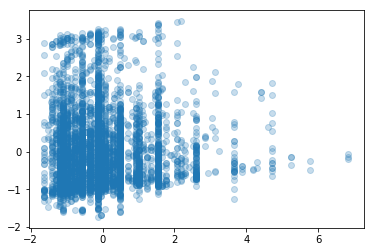

guests_included: correlation coef: 0.001020070183363626


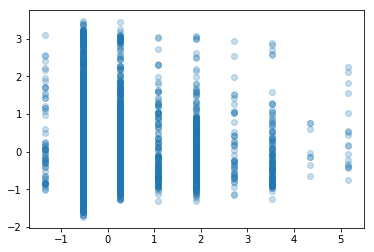

host_listings_count: correlation coef: 0.0010201037184893375


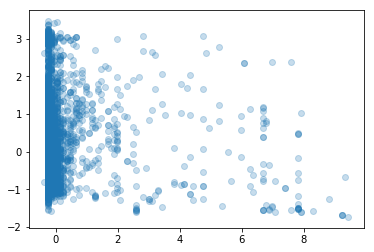

host_acceptance_rate: correlation coef: -0.0010200896226277266


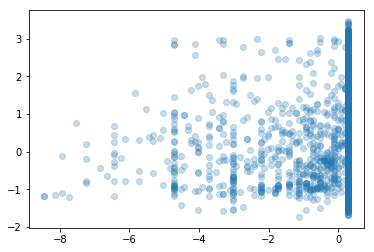

host_response_rate: correlation coef: -0.001020066171284325


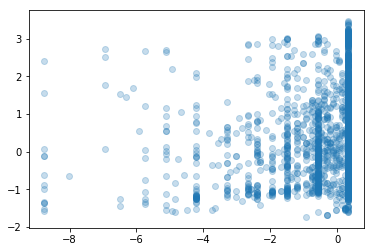

days_delta: correlation coef: -0.0010201541549749718


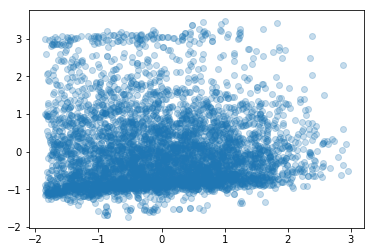

reviews_per_month: correlation coef: 0.001020099924393707


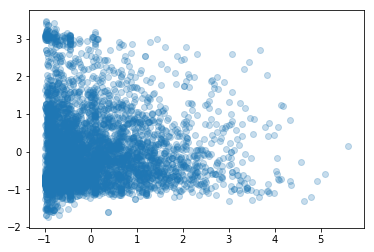

In [21]:
y_train_error = regr.predict(X_train) - y_train
for cname, c in zip(Train.columns, X_train.T):
    print '%s: correlation coef: %s' % (cname, np.corrcoef(c.ravel(), y_train_error.ravel())[1, 0])
    plt.scatter(c.ravel(), y_train_error.ravel(), alpha=0.25)
    plt.show()

In [22]:
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR


kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1234)


def build_model(model_name):
    return model_name()

for model_name in [LinearRegression, Ridge, ElasticNet, \
                   AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor]:
    
    model = build_model(model_name)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print model_name, results.mean()
    

<class 'sklearn.linear_model.base.LinearRegression'> -0.9653514134368019
<class 'sklearn.linear_model.ridge.Ridge'> -0.9653502303742465
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> -1.0006583133035734
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> -1.0118290310746814
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> -0.9297750077517819
<class 'sklearn.ensemble.forest.RandomForestRegressor'> -1.009561448194089


degree is: 2
Mean squared error: 0.95
r2 score: 0.07
explained variance score: 0.07


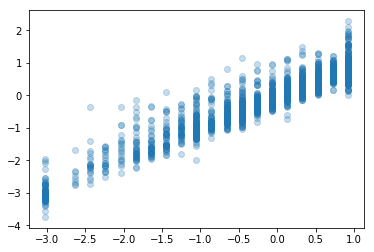

degree is: 3
Mean squared error: 1.13
r2 score: -0.11
explained variance score: -0.11


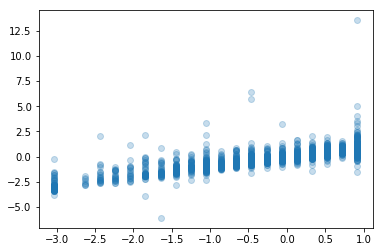

degree is: 4
Mean squared error: 26.54
r2 score: -24.96
explained variance score: -24.94


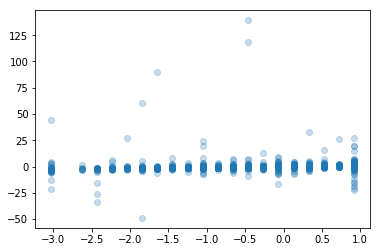

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score


degrees = [2, 3, 4]


for d in degrees:

    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=True, interaction_only=False)
    linear_regression = linear_model.Ridge(normalize=False, alpha=0.1, max_iter=10000)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # The degree 
    print 'degree is: %s' % d
    
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('r2 score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))
    
    # Explained variance score: 1 is perfect prediction
    print('explained variance score: %.2f' % explained_variance_score(y_test.tolist(), y_pred.tolist()))   
    plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
    plt.show()

Mean squared error: 0.94
r2 score: 0.08
explained variance score: 0.08


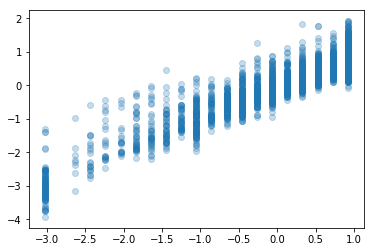

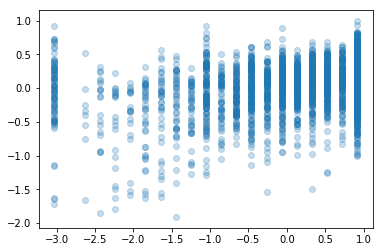

In [24]:
import xgboost


xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, 
                          subsample=0.5, colsample_bytree=0.5, max_depth=15, 
                          objective='reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()

Mean squared error: 0.93
r2 score: 0.09
explained variance score: 0.09


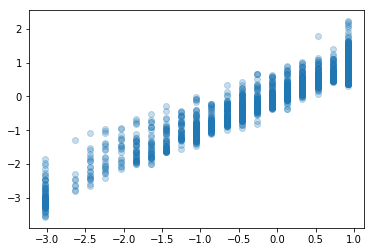

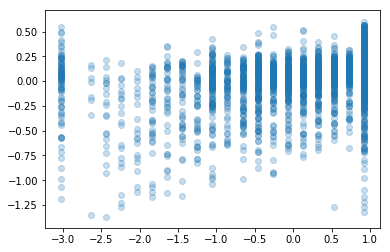

In [25]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, subsample=0.75, max_depth=15)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()

# Grid Search over GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [i*10 for i in range(1, 10)], 
    'learning_rate': [i*0.01 for i in range(1, 10)], 
    'subsample': [i*0.2 for i in range(1, 5)], 
    'max_depth': [i*2 for i in range(1, 20)], 
    'alpha': [i*0.05 for i in range(1, 10)]
}

gb = GradientBoostingRegressor()
clf = GridSearchCV(gb, parameters, verbose=2, cv=5)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 55404 candidates, totalling 277020 fits
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, lea

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.4, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=6, subsample=0.4, total=   0.4s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4, total=   0.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4, total=   0.5s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4, total=   0.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6, total=   0.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6, total=   0.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=8, subsample=0.6, total=   0.8s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4, total=   1.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4, total=   1.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4, total=   1.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4, total=   1.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.4, total=   0.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6, total=   2.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6, total=   2.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.6, total=   1.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8, total=   2.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=10, subsample=0.8, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.4, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6, total=   1.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6, total=   1.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.6, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=12, subsample=0.8, total=   2.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.4, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6, total=   1.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6, total=   1.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6, total=   1.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.6, total=   1.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8, total=   2.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8, total=   2.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8, total=   2.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=14, subsample=0.8, total=   4.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6, total=   2.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.6, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8, total=   3.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8, total=   2.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8, total=   2.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.8, total=   3.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2, total=   1.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2, total=   1.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=16, subsample=0.2, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8, total=   2.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8, total=   2.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8, total=   2.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.8, total=   2.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2, total=   1.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2, total=   1.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.2, total=   1.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4, total=   2.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=18, subsample=0.4, total=   2.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.8, total=   3.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2, total=   1.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4, total=   2.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4, total=   2.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4, total=   2.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4, total=   2.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.4, total=   2.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=20, subsample=0.6, total=   3.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8, total=   1.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.8, total=   1.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2, total=   1.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.2, total=   1.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4, total=   2.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4, total=   2.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4, total=   1.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.4, total=   2.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   3.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   3.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   3.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   4.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=22, subsample=0.6, total=   3.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6, total=   3.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6, total=   2.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6, total=   3.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.6, total=   3.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   5.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   4.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   4.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=24, subsample=0.8, total=   5.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6, total=   3.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.6, total=   3.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8, total=   4.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8, total=   3.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8, total=   5.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8, total=   5.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.8, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=26, subsample=0.2, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6, total=   2.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.6, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8, total=   4.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8, total=   4.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8, total=   4.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8, total=   4.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.8, total=   4.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=28, subsample=0.4, total=   3.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6, total=   2.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8, total=   2.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8, total=   2.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8, total=   2.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.8, total=   4.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.4, total=   3.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=30, subsample=0.6, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8, total=   2.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8, total=   2.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.8, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4, total=   2.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4, total=   2.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4, total=   2.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.4, total=   3.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   5.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   5.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   5.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   5.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=32, subsample=0.6, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   1.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.4, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6, total=   4.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6, total=   4.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6, total=   4.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6, total=   5.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.6, total=   5.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   6.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   6.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   6.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=34, subsample=0.8, total=   6.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.4, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6, total=   4.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6, total=   4.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6, total=   4.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.6, total=   4.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8, total=   5.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8, total=   5.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8, total=   6.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8, total=   6.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.01, max_depth=36, subsample=0.8, total=   6.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.4, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6, total=   2.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.6, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8, total=   5.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8, total=   5.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8, total=102.5min
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8, total=   8.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.8, total=   7.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.01, max_depth=38, subsample=0.2, total=   2

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.6, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=2, subsample=0.8, total=   0.2s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6, total=   0.1s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8, total=   0.2s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.2, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=6, subsample=0.4, total=   0.6s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8, total=   0.2s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.4, total=   1.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   1.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   1.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=8, subsample=0.6, total=   0.8s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4, total=   0.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4, total=   0.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4, total=   0.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.4, total=   0.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6, total=   0.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6, total=   0.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.6, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8, total=   1.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8, total=   1.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=10, subsample=0.8, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.4, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.6, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=12, subsample=0.8, total=   1.9s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.4, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.6, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8, total=   2.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8, total=   2.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8, total=   2.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8, total=   2.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=14, subsample=0.8, total=   2.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.4, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.6, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8, total=   1.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.8, total=   2.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   1.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   1.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   1.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   1.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=16, subsample=0.2, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.6, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8, total=   2.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.8, total=   2.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2, total=   0.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2, total=   0.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2, total=   1.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.2, total=   1.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   2.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   2.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   2.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=18, subsample=0.4, total=   2.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.8, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.2, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4, total=   1.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4, total=   2.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4, total=   2.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.4, total=   2.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6, total=   3.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6, total=   3.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=20, subsample=0.6, total=   3.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8, total=   1.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2, total=   0.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2, total=   0.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2, total=   0.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2, total=   0.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4, total=   1.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4, total=   1.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4, total=   1.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4, total=   1.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.4, total=   2.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6, total=   3.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6, total=   3.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6, total=   3.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.6, total=   3.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8, total=   4.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=22, subsample=0.8, total=   4.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4, total=   1.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6, total=   2.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6, total=   2.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6, total=   2.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6, total=   3.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.6, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8, total=   5.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8, total=   4.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8, total=   4.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8, total=   5.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.8, total=   5.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=24, subsample=0.2, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6, total=   2.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6, total=   2.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6, total=   3.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.6, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8, total=   4.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8, total=   3.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8, total=   3.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8, total=   3.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.8, total=   5.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=26, subsample=0.2, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6, total=   2.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8, total=   2.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8, total=   4.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8, total=   4.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.8, total=   4.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   3.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   3.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   3.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=28, subsample=0.4, total=   3.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8, total=   3.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8, total=   2.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8, total=   2.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8, total=   3.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.8, total=   3.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4, total=   3.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6, total=   5.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6, total=   4.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=30, subsample=0.6, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8, total=   3.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.2, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4, total=   3.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4, total=   2.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.4, total=   2.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6, total=   4.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6, total=   5.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.6, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8, total=   7.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=32, subsample=0.8, total= 5.1m

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8, total=   1.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8, total=   1.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.2, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4, total=   3.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4, total=   3.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.4, total=   3.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6, total=   4.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6, total=   4.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6, total=   4.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6, total=   4.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.6, total=   4.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8, total=   9.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8, total=   9.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8, total=  12.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8, total=   7.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=34, subsample=0.8, total=  11.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.2, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4, total=   3.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4, total=   4.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.4, total=   2.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6, total=   5.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6, total=   5.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6, total=   4.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.6, total=   4.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8, total=   6.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8, total=   6.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8, total=   6.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8, total=   6.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.02, max_depth=36, subsample=0.8, total=   8.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4, total=   4.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4, total=   3.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.4, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6, total=   2.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6, total=   3.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6, total=   3.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6, total=   3.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.6, total=   3.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8, total=   3.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8, total=   5.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8, total=   5.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.8, total=   5.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2, total=   1.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.02, max_depth=38, subsample=0.2, total=   0.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.6, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   1.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   1.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=4, subsample=0.8, total=   0.7s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8, total=   0.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.8, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2, total=   0.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2, total=   0.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.2, total=   0.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4, total=   0.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4, total=   0.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4, total=   0.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4, total=   0.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.4, total=   0.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=10, subsample=0.6, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4, total=   1.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4, total=   1.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4, total=   0.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4, total=   1.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.4, total=   0.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.6, total=   1.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=12, subsample=0.8, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.2, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.4, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.6, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8, total=   2.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8, total=   2.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8, total=   2.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8, total=   3.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=14, subsample=0.8, total=   3.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.4, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.6, total=   2.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8, total=   2.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8, total=   2.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8, total=   2.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=16, subsample=0.8, total=   3.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.6, total=   1.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8, total=   2.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8, total=   3.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.8, total=   3.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2, total=   1.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2, total=   1.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=18, subsample=0.2, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.6, total=   1.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8, total=   2.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8, total=   2.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8, total=   2.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.8, total=   2.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2, total=   1.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2, total=   1.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2, total=   1.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.2, total=   1.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4, total=   2.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4, total=   2.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=20, subsample=0.4, total=   2.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8, total=   1.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8, total=   2.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8, total=   1.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.8, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2, total=   1.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2, total=   1.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.2, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4, total=   2.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4, total=   2.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.4, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6, total=   3.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=22, subsample=0.6, total=   3.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8, total=   2.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2, total=   1.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.2, total=   1.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4, total=   2.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4, total=   2.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.4, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6, total=   4.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6, total=   4.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6, total=   3.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6, total=   4.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.6, total=   4.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=24, subsample=0.8, total=   5.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.2, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4, total=   2.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.4, total=   2.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6, total=   3.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6, total=   3.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.6, total=   5.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   6.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   7.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   6.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   7.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=26, subsample=0.8, total=   7.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.4, total=   1.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6, total=   3.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6, total=   3.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.6, total=   3.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8, total=   4.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8, total=   4.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8, total=   4.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8, total=   5.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.8, total=   5.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=28, subsample=0.2, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6, total=   2.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6, total=   2.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6, total=   2.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6, total=   2.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.6, total=   2.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8, total=   3.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8, total=   4.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8, total=   4.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8, total=   4.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.8, total=   4.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.2, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=30, subsample=0.4, total=   3.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6, total=   4.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6, total=   1.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6, total=   2.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8, total=   3.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8, total=   2.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8, total=   3.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8, total=   3.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.8, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4, total=   3.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4, total=   3.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4, total=   4.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.4, total=   3.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6, total=   5.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=32, subsample=0.6, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8, total=   1.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8, total=   3.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8, total=   3.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2, total=   1.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.2, total=   1.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4, total=   3.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4, total=   3.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.4, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6, total=   5.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6, total=   5.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6, total=   5.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6, total=   6.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.6, total=   6.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=34, subsample=0.8, total=   7.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   1.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   1.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   1.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2, total=   1.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.2, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4, total=   2.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4, total=   3.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.4, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6, total=   4.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6, total=   5.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6, total=   5.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6, total=   4.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.6, total=   5.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   7.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   7.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   7.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   7.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=36, subsample=0.8, total=   7.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4, total=   2.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4, total=   2.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4, total=   2.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.4, total=   2.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6, total=   3.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6, total=   4.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6, total=   4.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.6, total=   4.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8, total=   5.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8, total=   5.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8, total=   5.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8, total=   7.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.03, max_depth=38, subsample=0.8, total=   7.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.0s
[CV] 

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=2, subsample=0.4, total=   0.2s
[CV] n_e

[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8 
[CV]  n_estimators=10, 

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.6, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.6, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8, total=   0.4s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.8, total=   0.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2, total=   0.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.2, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.8, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2, total=   0.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.2, total=   0.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4, total=   0.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4, total=   0.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4, total=   0.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4, total=   1.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.4, total=   2.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6, total=   2.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6, total=   1.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=10, subsample=0.6, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8, total=   1.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4, total=   1.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4, total=   1.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4, total=   1.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.4, total=   1.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.6, total=   1.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8, total=   2.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=12, subsample=0.8, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.2, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.4, total=   3.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6, total=   3.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6, total=   3.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6, total=   3.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.6, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8, total=   2.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8, total=   2.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8, total=   2.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8, total=   2.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=14, subsample=0.8, total=   2.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4, total=   1.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.4, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6, total=   1.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6, total=   2.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.6, total=   2.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8, total=   2.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=16, subsample=0.8, total=   3.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.4, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6, total=   1.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6, total=   1.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.6, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8, total=   2.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8, total=   3.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.8, total=   3.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2, total=   1.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2, total=   1.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=18, subsample=0.2, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8, total=   3.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8, total=   3.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8, total=   3.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.8, total=   3.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.2, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4, total=   2.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=20, subsample=0.4, total=   3.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6, total=   0.8s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6, total=   2.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6, total=   1.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6, total=   1.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8, total=   2.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8, total=   2.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8, total=   2.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8, total=   2.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.8, total=   4.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2, total=   1.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2, total=   1.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2, total=   1.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4, total=   4.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4, total=   5.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4, total=   3.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4, total=   3.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.4, total=   6.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=22, subsample=0.6, total=  11.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   1.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   0.9s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8, total=   2.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8, total=   2.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.8, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.2, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4, total=   2.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.4, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   3.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   3.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   3.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   3.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=24, subsample=0.6, total=   4.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   0.8s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   1.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   1.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2, total=   1.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.2, total=   1.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4, total=   2.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4, total=   2.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.4, total=   2.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6, total=   3.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6, total=   4.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.6, total=   4.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   5.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   5.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   5.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=26, subsample=0.8, total=   5.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.4, total=   1.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6, total=   3.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6, total=   3.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.6, total=   3.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8, total=   4.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8, total=   4.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8, total=   5.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8, total=   5.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.8, total=   5.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=28, subsample=0.2, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.6, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8, total=   4.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8, total=   4.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8, total=   4.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8, total=   4.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.8, total=   4.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2, total=   2.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4, total=   3.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=30, subsample=0.4, total=   3.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6, total=   2.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8, total=   3.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8, total=   3.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8, total=   3.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8, total=   3.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.8, total=   5.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2, total=   2.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2, total=   2.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.2, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4, total=   3.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4, total=   3.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4, total=   3.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4, total=   3.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.4, total=   4.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=32, subsample=0.6, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   1.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8, total=   1.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8, total=   3.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8, total=   3.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.8, total=   3.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2, total=   1.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.2, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4, total=   3.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4, total=   2.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.4, total=   3.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   5.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=34, subsample=0.6, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   1.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   1.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   1.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   1.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.2, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4, total=   3.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.4, total=   3.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6, total=   4.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6, total=   4.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6, total=   4.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6, total=   5.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.6, total=   5.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   7.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   7.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   7.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=36, subsample=0.8, total=   7.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8, total=   1.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4, total=   2.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4, total=   2.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.4, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6, total=   4.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6, total=   4.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6, total=   4.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.6, total=   5.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8, total=   6.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8, total=   6.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8, total=   7.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8, total=   7.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.04, max_depth=38, subsample=0.8, total=   7.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2, total=   0.0s
[CV

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6, total=   0.0s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8, total=   0.1s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.6, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4, total=   0.3s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.4, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.6, total=   0.5s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8, total=   0.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8, total=   0.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8, total=   0.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8, total=   0.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.8, total=   0.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.4, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6, total=   0.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.6, total=   0.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8, total=   0.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8, total=   0.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8, total=   0.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8, total=   0.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.8, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=10, subsample=0.2, total=   0.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.6, total=   1.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.8, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2, total=   0.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2, total=   0.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.2, total=   0.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   1.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   1.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   1.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=12, subsample=0.4, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8, total=   1.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8, total=   1.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8, total=   1.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8, total=   1.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.8, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2, total=   0.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2, total=   0.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2, total=   0.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.2, total=   0.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4, total=   1.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4, total=   1.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4, total=   1.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.4, total=   1.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6, total=   3.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6, total=   2.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=14, subsample=0.6, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8, total=   1.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.4, total=   1.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6, total=   2.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6, total=   2.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6, total=   2.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.6, total=   2.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8, total=   3.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=16, subsample=0.8, total=   3.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.2, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4, total=   1.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4, total=   1.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.4, total=   1.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6, total=   2.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6, total=   2.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6, total=   2.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6, total=   2.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.6, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8, total=   4.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8, total=   4.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8, total=   3.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8, total=   3.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=18, subsample=0.8, total=   4.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.4, total=   2.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.6, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=20, subsample=0.8, total=   4.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6, total=   2.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.6, total=   2.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8, total=   3.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8, total=   3.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8, total=   4.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.8, total=   4.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2, total=   1.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=22, subsample=0.2, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8, total=   3.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8, total=   3.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8, total=   3.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8, total=   3.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.8, total=   3.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2, total=   1.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.2, total=   1.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=24, subsample=0.4, total=   2.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6, total=   1.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8, total=   2.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8, total=   2.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8, total=   2.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8, total=   2.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.8, total=   4.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2, total=   1.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2, total=   1.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2, total=   1.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4, total=   2.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4, total=   3.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.4, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=26, subsample=0.6, total=   4.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8, total=   1.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8, total=   1.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8, total=   2.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8, total=   2.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.8, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2, total=   1.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2, total=   1.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.2, total=   1.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4, total=   2.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4, total=   2.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4, total=   2.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.4, total=   3.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   4.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   4.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   4.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   4.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=28, subsample=0.6, total=   4.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   0.8s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   0.8s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4, total=   2.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4, total=   2.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.4, total=   2.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6, total=   3.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6, total=   3.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6, total=   3.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6, total=   4.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.6, total=   4.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   6.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   5.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   5.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=30, subsample=0.8, total=   5.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4, total=   2.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4, total=   2.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4, total=   1.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4, total=   2.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.4, total=   2.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6, total=   3.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6, total=   5.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6, total=   4.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6, total=   4.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.6, total=   4.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8, total=   6.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8, total=   5.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8, total=   6.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8, total=   5.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.8, total=   5.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=32, subsample=0.2, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6, total=   2.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.6, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8, total=   4.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8, total=   4.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8, total=   4.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8, total=   4.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.8, total=   4.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.2, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4, total=   3.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=34, subsample=0.4, total=   3.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8, total=   3.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8, total=   2.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8, total=   2.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8, total=55.2m

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.8, total=   5.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2, total=   1.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4, total=   4.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4, total=   4.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4, total=   3.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4, total= 3.8min
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.4, total=   4.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=36, subsample=0.6, total=  12.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   1.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   1.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8, total=   1.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8, total=   2.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8, total=   3.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8, total=   3.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.8, total=   3.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4, total=   2.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4, total=   3.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.4, total=   3.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   5.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   5.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   5.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.05, max_depth=38, subsample=0.6, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.2, total=   0.0s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=2, subsample=0.8, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2, total=   0.0s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.8, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.6, total=   0.1s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.6, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8, total=   0.2s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8, total=   0.1s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.2, total=   0.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.4, total=   0.4s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.6, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=8, subsample=0.8, total=   0.6s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.4, total=   0.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6, total=   0.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6, total=   0.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6, total=   0.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6, total=   0.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.6, total=   0.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8, total=   1.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8, total=   1.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8, total=   1.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8, total=   1.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.8, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=10, subsample=0.2, total=   0.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.4, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6, total=   0.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6, total=   0.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.6, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.8, total=   1.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=12, subsample=0.2, total=   0.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.6, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8, total=   1.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8, total=   1.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8, total=   1.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.8, total=   1.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2, total=   0.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2, total=   0.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2, total=   0.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2, total=   1.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.2, total=   1.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   1.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=14, subsample=0.4, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.8, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2, total=   0.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2, total=   1.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2, total=   1.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.2, total=   1.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4, total=   2.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.4, total=   1.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6, total=   2.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6, total=   2.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=16, subsample=0.6, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8, total=   1.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4, total=   1.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4, total=   1.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.4, total=   1.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6, total=   3.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6, total=   3.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6, total=   3.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.6, total=   3.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8, total=   4.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=18, subsample=0.8, total=   3.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.2, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4, total=   1.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4, total=   1.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4, total=   1.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.4, total=   2.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6, total=   2.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6, total=   2.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.6, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8, total=   4.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8, total=   4.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8, total=   5.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=20, subsample=0.8, total=   4.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4, total=   0.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4, total=   1.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.4, total=   1.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6, total=   2.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6, total=   3.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.6, total=   3.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8, total=   4.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8, total=   4.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8, total=   3.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8, total=   4.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=22, subsample=0.8, total=   5.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4, total=   1.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.4, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6, total=   2.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6, total=   2.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6, total=   2.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.6, total=   2.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8, total=   3.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8, total=   4.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8, total=   4.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.8, total=   4.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=24, subsample=0.2, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8, total=   3.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8, total=   3.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8, total=   3.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8, total=   4.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.8, total=   3.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=26, subsample=0.4, total=   2.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6, total=   1.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6, total=   1.9s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8, total=   2.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8, total=   2.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8, total=   2.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8, total=   2.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.8, total=   4.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4, total=   3.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4, total=   3.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4, total=   3.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4, total=   3.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.4, total=   3.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=28, subsample=0.6, total=   4.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8, total=   2.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8, total=   2.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.8, total=   2.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2, total=   1.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.2, total=   1.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4, total=   3.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4, total=   2.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4, total=   2.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.4, total=   3.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   4.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   5.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   4.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   5.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=30, subsample=0.6, total=   5.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   1.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   0.9s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   0.9s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   1.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2, total=   1.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2, total=   1.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2, total=   3.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.2, total=   1.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4, total=   2.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4, total=   3.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4, total=   3.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.4, total=   3.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6, total=   4.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6, total=   4.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6, total=   4.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6, total=   5.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.6, total=   5.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   8.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   7.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   7.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=32, subsample=0.8, total=   7.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4, total=   2.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4, total=   2.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4, total=   2.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.4, total=   2.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6, total=   3.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6, total=   4.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6, total=   4.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6, total=   5.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.6, total=   5.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8, total=   6.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8, total=   6.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8, total=   7.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8, total=   7.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.8, total=   7.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2, total=   2.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2, total=   2.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=34, subsample=0.2, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4, total=   1.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6, total=   3.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6, total=   3.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6, total=   3.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6, total=   2.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.6, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8, total=   6.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8, total=   6.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8, total=   9.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8, total=   7.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.8, total=  12.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2, total=   2.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2, total=   3.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2, total=   2.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.2, total=   2.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4, total=   4.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=36, subsample=0.4, total=   4.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4, total=   1.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6, total=   1.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6, total=   2.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6, total=   2.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8, total=   3.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8, total=   3.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8, total=   4.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8, total=   8.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.8, total=   5.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2, total=   1.9s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2, total=   1.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2, total=   1.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4, total=   4.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4, total=   4.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4, total=   4.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4, total=   4.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.4, total=   5.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.06, max_depth=38, subsample=0.6, total=   6.

[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8 
[CV]  n_estimators=20, 

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.2, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4, total=   0.3s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6, total=   0.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.6, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8, total=   0.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=2, subsample=0.8, total=   0.5s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.2, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.6, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2, total=   0.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2, total=   0.0s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.4, total=   0.4s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8, total=   0.3s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2, total=   0.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=6, subsample=0.2, total=   0.2s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8, total=   0.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.8, total=   0.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2, total=   0.5s
[CV] n_e

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=8, subsample=0.4, total=   0.5s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.8, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.2, total=   0.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4, total=   0.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4, total=   0.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4, total=   1.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4, total=   0.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.4, total=   1.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6, total=   1.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=10, subsample=0.6, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8, total=   0.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2, total=   0.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4, total=   0.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4, total=   0.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.4, total=   0.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6, total=   1.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6, total=   1.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.6, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=12, subsample=0.8, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.2, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4, total=   1.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.4, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6, total=   1.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6, total=   1.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6, total=   1.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.6, total=   2.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   3.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   2.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   2.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=14, subsample=0.8, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4, total=   1.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4, total=   1.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.4, total=   1.0s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6, total=   2.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6, total=   2.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.6, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8, total=   2.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8, total=   2.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8, total=   3.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.8, total=   2.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   1.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   1.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   1.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=16, subsample=0.2, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.6, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8, total=   2.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8, total=   2.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8, total=   2.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.8, total=   2.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2, total=   1.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2, total=   1.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2, total=   1.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.2, total=   1.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4, total=   2.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4, total=   2.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=18, subsample=0.4, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6, total=   0.8s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8, total=   2.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8, total=   2.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8, total=   2.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.8, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2, total=   1.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.2, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4, total=   2.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4, total=   2.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4, total=   2.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.4, total=   2.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6, total=   3.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=20, subsample=0.6, total=   3.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8, total=   2.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2, total=   0.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2, total=   0.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.2, total=   1.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4, total=   2.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4, total=   2.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.4, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6, total=   4.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6, total=   3.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6, total=   3.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6, total=   3.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.6, total=   4.0s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=22, subsample=0.8, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   1.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   1.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4, total=   1.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4, total=   1.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.4, total=   2.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6, total=   3.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6, total=   3.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6, total=   3.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.6, total=   4.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   5.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   5.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   5.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=24, subsample=0.8, total=   5.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4, total=   1.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.4, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6, total=   2.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6, total=   3.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6, total=   3.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.6, total=   3.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8, total=   4.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8, total=   4.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8, total=   4.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8, total=   5.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=26, subsample=0.8, total=   6.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4, total=   1.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.4, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6, total=   2.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6, total=   2.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6, total=   2.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.6, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8, total=   4.7s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8, total=   4.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8, total=   5.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.8, total=   4.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2, total=   1.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=28, subsample=0.2, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6, total=   1.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6, total=   1.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.6, total=   2.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8, total=   3.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8, total=   3.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8, total=   3.5s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8, total=   3.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.8, total=   3.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.2, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=30, subsample=0.4, total=   3.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6, total=   2.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6, total=   2.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.6, total=   2.0s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8, total=   2.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8, total=   2.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8, total=   2.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8, total=   4.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.8, total=   4.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2, total=   1.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2, total=   1.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2, total=   1.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.2, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   3.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   3.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   3.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   3.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=32, subsample=0.4, total=   3.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   0.6s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8, total=   2.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8, total=   2.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8, total=   2.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.8, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2, total=   1.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2, total=   1.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.2, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4, total=   2.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4, total=   2.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4, total=   3.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.4, total=   3.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   4.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   4.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   4.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=34, subsample=0.6, total=   4.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6, total=   1.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8, total=   1.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8, total=   1.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8, total=   1.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8, total=   1.0s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4, total=   2.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4, total=   2.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4, total=   2.4s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.4, total=   2.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6, total=   3.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6, total=   3.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6, total=   4.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6, total=   4.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.6, total=   4.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8, total=   5.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8, total=   5.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=36, subsample=0.8, total=   6.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8, total=   0.7s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2, total=   0.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4, total=   1.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4, total=   1.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4, total=   1.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4, total=   1.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.4, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6, total=   3.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6, total=   3.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6, total=   3.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6, total=   3.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.6, total=   3.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8, total=   4.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8, total=   6.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8, total=   6.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8, total=   6.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.8, total=   6.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2, total=   2.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.07, max_depth=38, subsample=0.2, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6, total=   0.0s
[CV] n_e

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.8, total=   0.1s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.2, total=   0.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.4, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6, total=   0.1s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=2, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.1s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.2, total=   0.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.4, total=   0.1s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.4, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.6, total=   0.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=4, subsample=0.8, total=   0.4s
[CV] n_e

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.2, total=   0.1s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.4, total=   0.2s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.6, total=   0.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_e

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8, total=   0.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8, total=   0.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=6, subsample=0.8, total=   0.5s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2, total=   0.0s
[CV] n_e

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4, total=   0.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4, total=   0.2s
[CV] n_e

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.4, total=   0.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.6, total=   0.4s
[CV] n_e

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8, total=   0.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.8, total=   0.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=8, subsample=0.2, total=   0.4s
[CV] n_e

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4, total=   0.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6, total=   0.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.6, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8, total=   0.6s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8, total=   0.7s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.8, total=   0.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2, total=   0.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2, total=   0.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.2, total=   0.6s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=10, subsample=0.4, total=   0.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4, total=   0.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6, total=   0.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.8, total=   1.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2, total=   0.5s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.2, total=   0.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4, total=   1.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4, total=   1.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4, total=   1.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4, total=   1.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.4, total=   1.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=12, subsample=0.6, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8, total=   0.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.8, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2, total=   0.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2, total=   0.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.2, total=   0.6s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4, total=   1.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4, total=   1.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.4, total=   1.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   2.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   1.9s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=14, subsample=0.6, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   0.3s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2, total=   0.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.2, total=   0.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4, total=   0.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4, total=   0.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.4, total=   1.3s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6, total=   1.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6, total=   1.7s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6, total=   1.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6, total=   2.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.6, total=   2.5s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   2.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   2.7s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   3.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=16, subsample=0.8, total=   3.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8, total=   0.5s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2, total=   0.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4, total=   1.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4, total=   1.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4, total=   1.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4, total=   1.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.4, total=   1.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6, total=   2.0s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6, total=   2.2s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.6, total=   2.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8, total=   2.8s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8, total=   2.

[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8, total=   3.4s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8, total=   4.1s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.8, total=   4.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2, total=   1.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=18, subsample=0.2, total=   1.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2, total=   0.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4, total=   1.1s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6, total=   1.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6, total=   1.5s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6, total=   1.6s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.6, total=   1.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8, total=   3.1s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8, total=   2.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8, total=   2.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8, total=   2.9s
[CV] n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8 
[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.8, total=   3.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2, total=   1.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2, total=   1.4s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.2, total=   1.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4, total=   2.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=20, subsample=0.4, total=   2.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4, total=   0.7s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4, total=   0.6s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6, total=   0.9s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6, total=   0.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6, total=   1.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6, total=   1.9s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8, total=   2.4s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8, total=   2.3s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8, total=   2.2s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8, total=   2.

[CV]  n_estimators=60, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.8, total=   3.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2, total=   1.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2, total=   1.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2, total=   1.2s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2, total=   1.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.2, total=   1.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4, total=   2.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4, total=   2.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4, total=   2.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4, total=   2.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.4, total=   3.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=22, subsample=0.6, total=   4.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   1.0s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8, total=   1.2s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8, total=   1.

[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8, total=   2.7s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8, total=   2.8s
[CV] n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8 
[CV]  n_estimators=40, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.8, total=   3.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2, total=   1.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2, total=   1.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.2, total=   1.4s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4, total=   2.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4, total=   2.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.4, total=   3.5s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   4.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   4.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   4.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   4.3s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=24, subsample=0.6, total=   4.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   1.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   1.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   1.3s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   1.4s
[CV] n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8 
[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2, total=   1.1s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.2, total=   1.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4, total=   2.3s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4, total=   2.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.4, total=   2.5s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6, total=   3.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6, total=   3.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6, total=   4.7s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.6, total=   4.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   6.2s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   5.8s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   5.6s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=26, subsample=0.8, total=   5.

[CV]  n_estimators=20, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8, total=   1.5s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2, total=   0.7s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.2, total=   0.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4, total=   1.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4, total=   1.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4, total=   1.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.4, total=   1.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.6, total=   3.6s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8, total=   4.8s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8, total=   4.

[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8, total=   5.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8, total=   5.9s
[CV] n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8 
[CV]  n_estimators=90, alpha=0.05, learning_rate=0.08, max_depth=28, subsample=0.8, total=   6.1s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2, total=   0.6s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4, total=   1.2s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.4, total=   2.0s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6, total=   2.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6, total=   3.3s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6, total=   2.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.6, total=   2.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8, total=   5.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8, total=   5.0s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8, total=   5.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8, total=   5.1s
[CV] n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8 
[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.8, total=   5.2s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=30, subsample=0.2, total=   1.

[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   0.2s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4, total=   0.4s
[CV] n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4 
[CV]  n_estimators=10, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4, total=   0.

[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4, total=   1.3s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.4, total=   1.4s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6, total=   2.1s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6, total=   1.8s
[CV] n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6 
[CV]  n_estimators=30, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6, total=   1.

[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6, total=   2.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.6, total=   2.9s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8, total=   3.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8, total=   3.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8, total=   3.8s
[CV] n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8 
[CV]  n_estimators=50, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8, total=   3.

[CV]  n_estimators=70, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.8, total=   6.3s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   2.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   2.0s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   1.8s
[CV] n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2 
[CV]  n_estimators=80, alpha=0.05, learning_rate=0.08, max_depth=32, subsample=0.2, total=   2.

# Grid Search Done

In [ ]:
print 'grid search done'

# Stack some Models using StackingRegressor

## Create a model list first

In [26]:
lass = linear_model.Lasso(alpha=0.001, fit_intercept=False, 
                          max_iter=10000)

ridge = linear_model.Ridge(normalize=False, alpha=0.1, 
                           max_iter=10000)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, 
                               subsample=0.75, max_depth=15)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, 
                           gamma=0, subsample=0.5, colsample_bytree=0.5, 
                           max_depth=15, objective='reg:linear')

randf = RandomForestRegressor(n_estimators=100, min_samples_split=10)

svr_rbf = SVR(kernel='rbf')

## Let's give mlxtend API a go

Mean squared error: 0.97
Variance score: 0.05
train residuals:


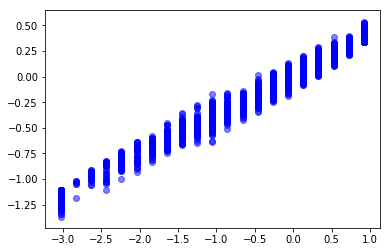

test residuals:


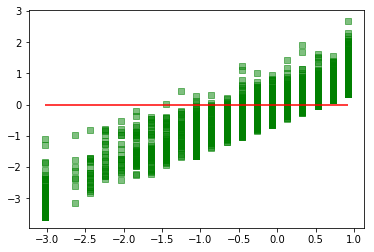

In [27]:
from mlxtend.regressor import StackingRegressor

model_list = [lass, xgb, randf]
meta_regr = gb

st_regr = StackingRegressor(model_list, meta_regressor=meta_regr)

# Train the model using the training sets
st_regr.fit(X_train, y_train)

y_train_pred = st_regr.predict(X_train)

# Make predictions using the testing set
y_pred = st_regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()


## Let's try vecstack API too

task:         [regression]
metric:       [rmse]
variant:      [A]
n_estimators: [4]

estimator  0: [gbf: GradientBoostingRegressor]
    fold  0:  [0.96552593]
    fold  1:  [1.00856827]
    fold  2:  [0.94667931]
    fold  3:  [0.76998769]
    fold  4:  [1.04323793]
    fold  5:  [0.86872120]
    fold  6:  [0.95864224]
    fold  7:  [0.85897846]
    fold  8:  [0.97475966]
    fold  9:  [0.95111469]
    fold 10:  [0.94851709]
    fold 11:  [0.62733938]
    fold 12:  [0.78173563]
    fold 13:  [0.86692686]
    fold 14:  [0.92873770]
    fold 15:  [1.05908383]
    fold 16:  [1.01839881]
    fold 17:  [1.08432968]
    fold 18:  [1.14804929]
    fold 19:  [0.80667538]
    ----
    MEAN:     [0.93080045] + [0.11982353]

estimator  1: [abr: AdaBoostRegressor]
    fold  0:  [0.97637167]
    fold  1:  [1.02996480]
    fold  2:  [0.96044515]
    fold  3:  [0.81340390]
    fold  4:  [1.06526451]
    fold  5:  [0.91573642]
    fold  6:  [0.99209952]
    fold  7:  [0.90425556]
    fold  8:  [1.0051

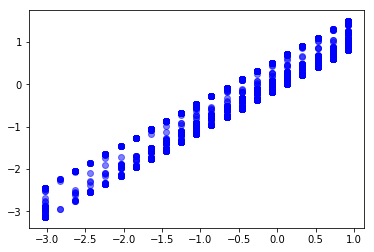

test residuals:


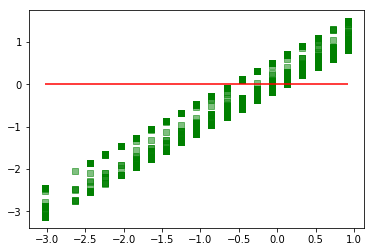

In [53]:
from vecstack import StackingTransformer
from vecstack import stacking
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

def rmse(train, pred):
    return mean_squared_error(train, pred)


lass = linear_model.Lasso(alpha=0.001, fit_intercept=False, 
                          max_iter=10000)

ridge = linear_model.Ridge(normalize=False, alpha=0.001, 
                           max_iter=10000)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, 
                               subsample=0.75, max_depth=15)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, 
                           gamma=0, subsample=0.5, colsample_bytree=0.5, 
                           max_depth=15, objective='reg:linear')

randf = RandomForestRegressor(n_estimators=100, min_samples_split=10)

svr_rbf = SVR(kernel='rbf')


estimators = [
              ('gbf', GradientBoostingRegressor(alpha=0.001)), 
              ('abr', AdaBoostRegressor(learning_rate=0.001)),
              ('xgb', xgb), 
              ('randf', randf)]

stack = StackingTransformer(estimators, regression=True, 
                            shuffle=True, n_folds=20, 
                            metric=rmse, verbose=2, 
                           )

stack = stack.fit(X_train, y_train)

# Get stacked features
S_train = stack.transform(X_train)
S_test = stack.transform(X_test)

# Use 2nd level estimator on Stacked data
model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05)

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

task:         [regression]
metric:       [rmse]
mode:         [oof_pred]
n_models:     [5]

model  0:     [GradientBoostingRegressor]
    fold  0:  [0.92293955]
    fold  1:  [0.93731359]
    fold  2:  [0.90946257]
    fold  3:  [0.97954962]
    fold  4:  [0.97417745]
    ----
    MEAN:     [0.94468856] + [0.02776029]
    FULL:     [0.94468264]

    Fitting on full train set...

model  1:     [AdaBoostRegressor]
    fold  0:  [0.92566295]
    fold  1:  [0.95730986]
    fold  2:  [0.92750432]
    fold  3:  [0.98092310]
    fold  4:  [0.96471134]
    ----
    MEAN:     [0.95122231] + [0.02152660]
    FULL:     [0.95121961]

    Fitting on full train set...

model  2:     [ExtraTreesRegressor]
    fold  0:  [0.94719286]
    fold  1:  [0.96956368]
    fold  2:  [0.93033224]
    fold  3:  [0.96785139]
    fold  4:  [0.98202443]
    ----
    MEAN:     [0.95939292] + [0.01833325]
    FULL:     [0.95938838]

    Fitting on full train set...

model  3:     [XGBRegressor]
    fold  0:  [0.957810

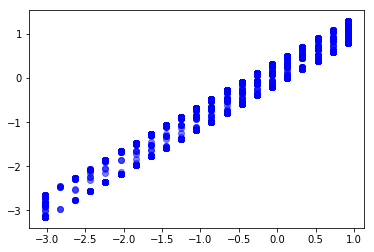

test residuals:


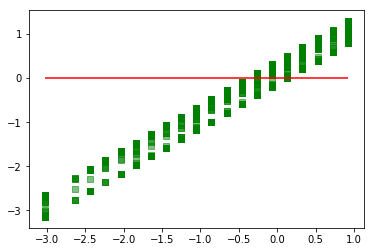

In [70]:
from sklearn.ensemble import ExtraTreesRegressor



estimators = [GradientBoostingRegressor(alpha=0.001), 
              AdaBoostRegressor(learning_rate=0.001), 
              ExtraTreesRegressor(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3), 
              xgb, randf]


S_train, S_test = stacking(estimators, X_train, y_train, X_test, 
                          regression=True, n_folds=5, metric=rmse, 
                          mode='oof_pred', 
                          random_state=1234, 
                          verbose=2)

# Use 2nd level estimator on Stacked data
model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05)

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)


# Train mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_train.ravel(), y_train_pred.ravel()))
# Train explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train.ravel(), y_train_pred.ravel()))

# Test mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Test explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

# Try Blending

In [64]:
from sklearn.ensemble import ExtraTreesRegressor



estimators = [GradientBoostingRegressor(alpha=0.001), 
              AdaBoostRegressor(learning_rate=0.001), 
              ExtraTreesRegressor(random_state = 0, n_jobs = -1, n_estimators = 100, max_depth = 3), 
              xgb, randf]


S_train, S_test = stacking(estimators, X_train, y_train, X_test, 
                          regression=True, n_folds=5, metric=rmse, 
                          mode='oof_pred', 
                          random_state=1234, 
                          verbose=2)

task:         [regression]
metric:       [rmse]
mode:         [oof_pred]
n_models:     [5]

model  0:     [GradientBoostingRegressor]
    fold  0:  [0.92575201]
    fold  1:  [0.93667884]
    fold  2:  [0.91094383]
    fold  3:  [0.97863548]
    fold  4:  [0.97414521]
    ----
    MEAN:     [0.94523108] + [0.02675844]
    FULL:     [0.94522528]

    Fitting on full train set...

model  1:     [AdaBoostRegressor]
    fold  0:  [0.92932365]
    fold  1:  [0.95721378]
    fold  2:  [0.91966267]
    fold  3:  [0.98562742]
    fold  4:  [0.96652900]
    ----
    MEAN:     [0.95167130] + [0.02420107]
    FULL:     [0.95166832]

    Fitting on full train set...

model  2:     [ExtraTreesRegressor]
    fold  0:  [0.94719286]
    fold  1:  [0.96956368]
    fold  2:  [0.93033224]
    fold  3:  [0.96785139]
    fold  4:  [0.98202443]
    ----
    MEAN:     [0.95939292] + [0.01833325]
    FULL:     [0.95938838]

    Fitting on full train set...

model  3:     [XGBRegressor]
    fold  0:  [0.957810

In [69]:
final_prediction = np.mean(S_test, axis=1)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), final_prediction.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), final_prediction.ravel()))

Mean squared error: 0.92
Variance score: 0.10


In [ ]:
# Use 2nd level estimator on Stacked data
model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05)

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()